# Pi value from the hypersphere volume

Suppose you forgot the value of $\pi$ but somehow you remember the formula of the volume of a hypersphere. How can you get the value of $\pi$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform


3.142552


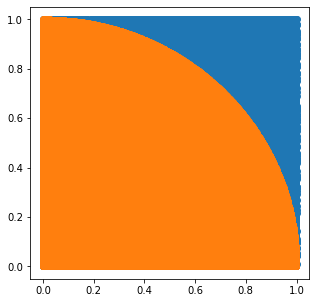

In [2]:
N_ext = 1000000  #number of the total extracted points(x2)
x = uniform(0,1).rvs(N_ext)
y = uniform(0,1).rvs(N_ext)

circle = x**2 + y**2  #circle function

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(x,y)
plt.scatter(x[circle<1], y[circle<1])  #good points scattered in orange


good_points = 0
for i in range(N_ext):
    if circle[i]<1:
        good_points += 1

area = good_points*4/N_ext  #evaluating the circle area
print(area)

3.1418201999999997


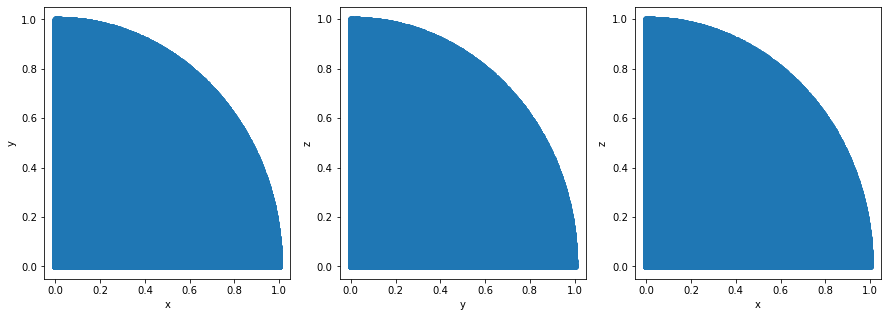

In [7]:
#let's take a sphere

x = uniform(0,1).rvs(N_ext)
y = uniform(0,1).rvs(N_ext)
z = uniform(0,1).rvs(N_ext)

sphere = x**2 + y**2 + z**2

good_points = 0
x_good = []
y_good = []
z_good = []

for i in range(N_ext):
    if sphere[i]<1:
        good_points += 1
        x_good.append(x[i])
        y_good.append(y[i])
        z_good.append(z[i])

fig, ax = plt.subplots(1,3, figsize=(15,5))


ax[0].scatter(x_good, y_good)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(y_good, z_good)
ax[1].set_xlabel('y')
ax[1].set_ylabel('z')

ax[2].scatter(x_good, z_good)
ax[2].set_xlabel('x')
ax[2].set_ylabel('z')

sphere_vol = 8*good_points/N_ext
print(sphere_vol*3/4)

The volume of a sphere $V$ in $n$ dimensions is described by the formula:

$$ V = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)} R^{n}$$

Now the function $\Gamma$ is defined such that 
- $\Gamma(1) = 1$ 
- $\Gamma(\frac{1}{2}) = \sqrt{\pi}$
- $\Gamma(x) = (x-1)\Gamma(x-1)$

So if $n$ is even then:

$$\Gamma_{even}(\frac{n}{2}+1) = \frac{n}{2}(\frac{n}{2}-1)...1\Gamma(1) = (\frac{n}{2})!$$

if $n$ is odd then:

$$\Gamma_{odd}(\frac{n}{2}+1) = \frac{n}{2}(\frac{n}{2}-1)...\frac{1}{2}\Gamma(\frac{1}{2}) = (\frac{n}{2})! \sqrt{\pi} $$

So when it comes to the value of $\pi$ starting from the volume:

- if $n$ is even:

    $$V = \frac{\pi^{n/2}}{(\frac{n}{2})!} $$
    
    $$ \pi = \big[V \big(\frac{n}{2}\big)!\big]^{2/n} $$
    
- if $n$ is odd:

    $$V = \frac{\pi^{n/2}}{(\frac{n}{2})! \sqrt{\pi}} $$
    
    $$ \pi = \big[V \big(\frac{n}{2}\big)!\big]^{2/(n-1)} $$




In [4]:
def pi_estimator(x, vol):      #x = number of dimensions, vol = volume computed through MC
    fact   = x/2
    if x%2 == 0: #x is even
        gamma = fact
        while fact > 1:
            fact = fact-1
            gamma *= fact            
        pi = (vol*gamma)**(2/x)  
        
    if x%2 != 0: #x is odd
        gamma = fact
        while fact >= 3/2:
            fact = fact -1
            gamma *= fact
        pi = (vol*gamma)**(2/(x-1))
    return pi

print(pi_estimator(6, 1/6*np.pi**3)) #just a check in 6 dimensions

3.141592653589793


In [5]:
#DON'T RUN THIS!! IT TAKES TOO MUCH

N_dim = np.arange(2, 25, 1)
N_ext = 10000000

volume = np.zeros([len(N_dim)])
pi_est = np.zeros([len(N_dim)])

np.random.seed(432)

for i in range(len(N_dim)):
    
    x = np.zeros([N_dim[i], N_ext])
    
    for k in range(N_dim[i]):
        x[k,:] = uniform(0,1).rvs(N_ext)
    
    equation = np.sum(x**2, axis = 0)

    good_points=0
    for j in range(N_ext):
        if equation[j]<1:
            good_points += 1
    
    volume[i] = good_points/N_ext*2**(N_dim[i])
    pi_est[i] = pi_estimator(N_dim[i], volume[i])


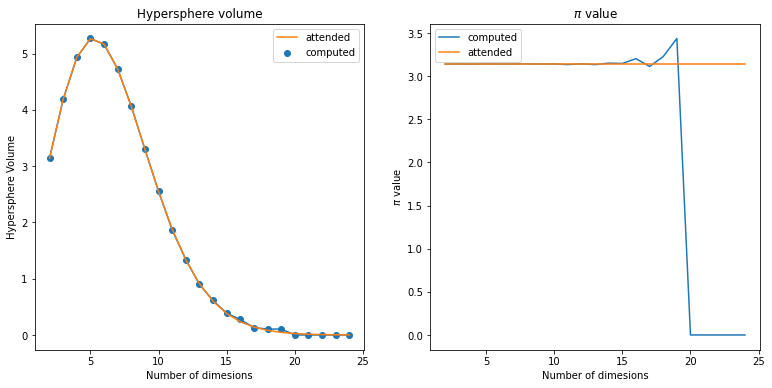

In [6]:
from scipy.special import gamma

fig, ax = plt.subplots(1,2, figsize=(13,6))

titles=['Hypersphere volume', '$\pi$ value']

ax[0].set_ylabel('Hypersphere Volume')
ax[1].set_ylabel('$\pi$ value')
ax[0].plot(N_dim, volume)
ax[0].scatter(N_dim, volume, label='computed')
ax[0].plot(N_dim, np.pi**(N_dim/2)/gamma(N_dim/2+1), label='attended')
ax[1].plot(N_dim, pi_est, label='computed')
ax[1].plot(N_dim, np.pi+0*N_dim, label='attended')

for i in range(2):
    ax[i].set_xlabel('Number of dimesions')
    ax[i].set_title(titles[i])
    ax[i].legend()

The volume of the hypersphere rapidly decreases as we increase the dimensionality, therefore we would need to sample many more points as N increases! After N=19 the volume and consequently also the estimated value of $\pi$ goes to zero because none of the points we are extracting is inside the hypersphere volume!